
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:

# # Create SparkSession from builder
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[1]") \
#                     .appName('SparkByExamples.com') \
#                     .getOrCreate()

In [3]:

spark.version



'3.0.0'

In [4]:
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [ ]:
#
# SparkContext stop() method
#spark.sparkContext.stop()


In [ ]:

# Create SparkContext
#from pyspark import SparkContext
#sc = SparkContext("local", "ALY6110_App")
#print(sc.appName)


In [5]:
# read CSV file
df_housing=spark.read.csv('/content/BostonHousing.csv',header=True, inferSchema=True)

In [6]:
df_housing.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [7]:
# Get the number of rows
num_rows = df_housing.count()

# Get the number of columns
num_columns = len(df_housing.columns)

# Display the shape of the DataFrame
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 506
Number of Columns: 14


In [8]:
df_housing.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [9]:
import pandas as pd
pd.DataFrame(df_housing.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,crim,double
1,zn,double
2,indus,double
3,chas,int
4,nox,double
5,rm,double
6,age,double
7,dis,double
8,rad,int
9,tax,int


In [10]:
from pyspark.sql.functions import col
import numpy as np
# check for any missing values
for column in df_housing.columns:
    print(column, df_housing.filter(col(column).cast("float").isin([None,np.nan])).count())

crim 0
zn 0
indus 0
chas 0
nox 0
rm 0
age 0
dis 0
rad 0
tax 0
ptratio 0
b 0
lstat 0
medv 0


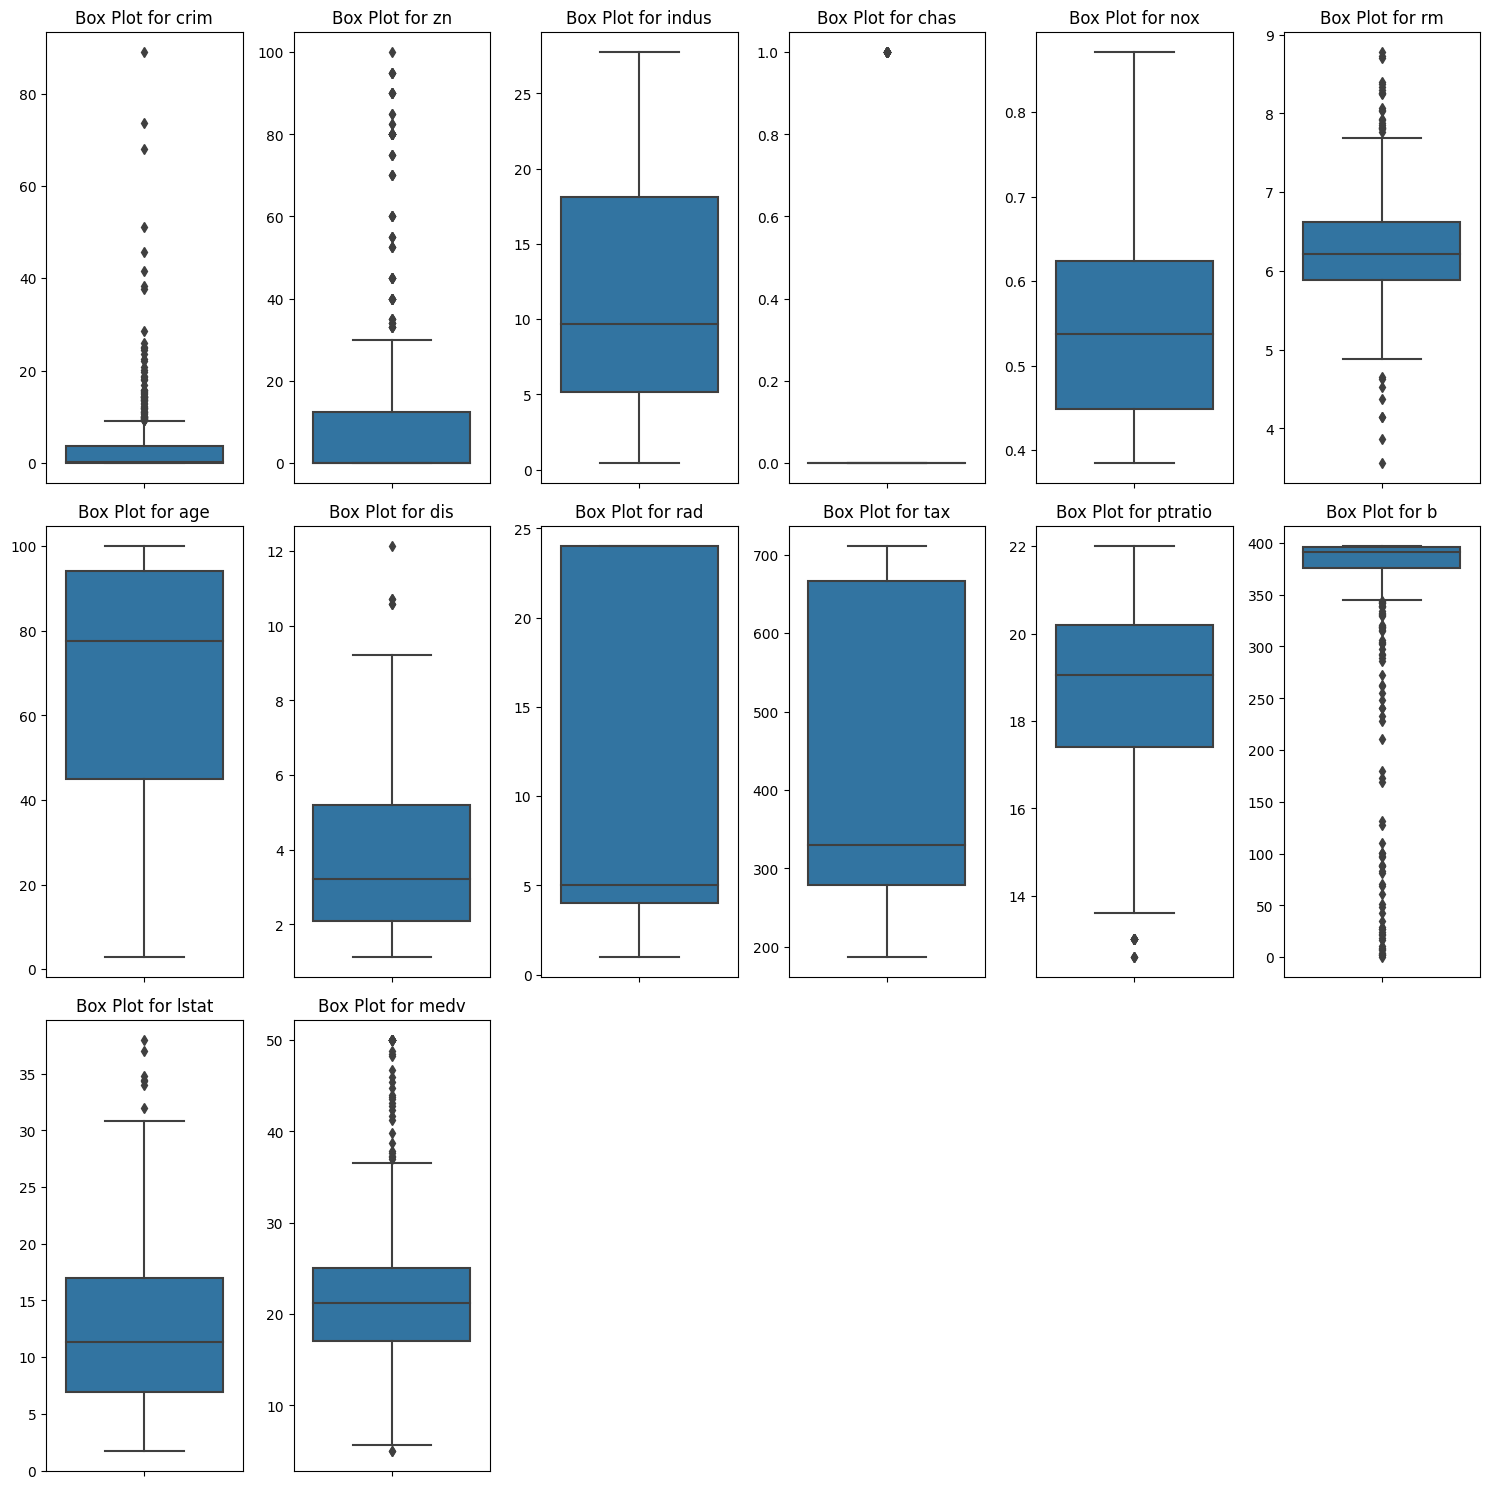

In [11]:
# Box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the entire DataFrame to a Pandas DataFrame
df_pandas = df_housing.toPandas()

# Specify the columns for which you want to create box plots
columns_to_plot = df_pandas.columns

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(columns_to_plot) + 5) // 6  # Calculate the number of rows based on 6 columns per row
num_cols = 6  # Six columns per row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, column in enumerate(columns_to_plot):
    if i < len(axes):  # Check if we have more axes than columns to avoid index out of bounds error
        sns.boxplot(y=df_pandas[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')
        axes[i].set_ylabel("")  # Remove y-axis label for better spacing

# Remove any empty subplots (if the number of columns is not a multiple of 6)
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()


In [12]:
from pyspark.sql.functions import col

# Define a function to find and show outliers for a specific column
def find_outliers(column_name):
    quantiles = df_housing.approxQuantile(column_name, [0.25, 0.75], 0.01)
    q1 = quantiles[0]
    q3 = quantiles[1]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter rows where the column value is an outlier
    outliers = df_housing.filter((col(column_name) < lower_bound) | (col(column_name) > upper_bound))

    # Calculate the percentage of outliers
    total_count = df_housing.count()
    outlier_count = outliers.count()
    percentage = (outlier_count / total_count) * 100

    return outliers, outlier_count, percentage

# Specify the columns for which you want to find outliers
columns_to_check = df_housing.columns

# Iterate through the columns and find outliers
for column in columns_to_check:
    outliers, outlier_count, outlier_percentage = find_outliers(column)

    # Show the count and percentage of outliers for each column
    #print(f"Outliers for column '{column}':")
    #outliers.show()
    print(f"Count of outliers for column '{column}': {outlier_count}")
    print(f"Percentage of outliers for column '{column}': {outlier_percentage}%")


Count of outliers for column 'crim': 74
Percentage of outliers for column 'crim': 14.624505928853754%
Count of outliers for column 'zn': 68
Percentage of outliers for column 'zn': 13.438735177865613%
Count of outliers for column 'indus': 0
Percentage of outliers for column 'indus': 0.0%
Count of outliers for column 'chas': 35
Percentage of outliers for column 'chas': 6.91699604743083%
Count of outliers for column 'nox': 0
Percentage of outliers for column 'nox': 0.0%
Count of outliers for column 'rm': 31
Percentage of outliers for column 'rm': 6.126482213438735%
Count of outliers for column 'age': 0
Percentage of outliers for column 'age': 0.0%
Count of outliers for column 'dis': 5
Percentage of outliers for column 'dis': 0.9881422924901186%
Count of outliers for column 'rad': 0
Percentage of outliers for column 'rad': 0.0%
Count of outliers for column 'tax': 0
Percentage of outliers for column 'tax': 0.0%
Count of outliers for column 'ptratio': 0
Percentage of outliers for column 'ptr

In [13]:
from pyspark.sql.functions import col

# Define a function to remove extreme outliers for a specific column
def remove_extreme_outliers(df, column_name):
    quantiles = df.approxQuantile(column_name, [0.25, 0.75], 0.01)
    q1 = quantiles[0]
    q3 = quantiles[1]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter rows where the column value is an outlier
    extreme_outliers = df.filter((col(column_name) < lower_bound) | (col(column_name) > upper_bound))

    # Remove extreme outliers from the DataFrame
    df_filtered = df.subtract(extreme_outliers)

    return df_filtered

# Specify the columns with extreme outliers
columns_with_extreme_outliers = ["crim", "b"]  # Update with the columns you want to process

# Iterate through the columns and remove extreme outliers
for column in columns_with_extreme_outliers:
    df_housing = remove_extreme_outliers(df_housing, column)

# Show the shape of the DataFrame after outlier removal
print("Shape of the DataFrame after outlier removal:", (df_housing.count(), len(df_housing.columns)))


Shape of the DataFrame after outlier removal: (384, 14)


In [14]:
from pyspark.sql.functions import col, mean, when
from pyspark.sql.window import Window

# Define a function to replace outliers with the mean for a specific column
def replace_outliers_with_mean(df, column_name):
    # Calculate the mean for the column
    mean_value = df.select(mean(column_name)).collect()[0][0]

    # Calculate the lower and upper bounds for outliers
    quantiles = df.approxQuantile(column_name, [0.25, 0.75], 0.01)
    q1 = quantiles[0]
    q3 = quantiles[1]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value
    df = df.withColumn(column_name,
                       when((col(column_name) < lower_bound) | (col(column_name) > upper_bound), mean_value)
                       .otherwise(col(column_name)))

    return df

# Iterate through the columns (excluding 'CRIM' and 'B') and replace outliers with mean
columns_to_replace_with_mean = [column for column in df_housing.columns if column not in ["crim", "b","age", "nox" ,"indus","rad","tax","ptratio"]]
for column in columns_to_replace_with_mean:
    df_housing = replace_outliers_with_mean(df_housing, column)

# Show the first few rows of the DataFrame after replacing outliers with mean
df_housing.show(5)


+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
| 0.1396|0.0| 8.56| 0.0| 0.52|6.167|90.0| 2.421|  5|384|   20.9|392.69|12.33|20.1|
|0.06899|0.0|25.65| 0.0|0.581| 5.87|69.7|2.2577|  2|188|   19.1|389.15|14.37|22.0|
|0.15936|0.0| 6.91| 0.0|0.448|6.211| 6.5|5.7209|  3|233|   17.9|394.46| 7.44|24.7|
|0.08707|0.0|12.83| 0.0|0.437| 6.14|45.8|4.0905|  5|398|   18.7|386.96|10.27|20.8|
|0.07896|0.0|12.83| 0.0|0.437|6.273| 6.0|4.2515|  5|398|   18.7|394.92| 6.78|24.1|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



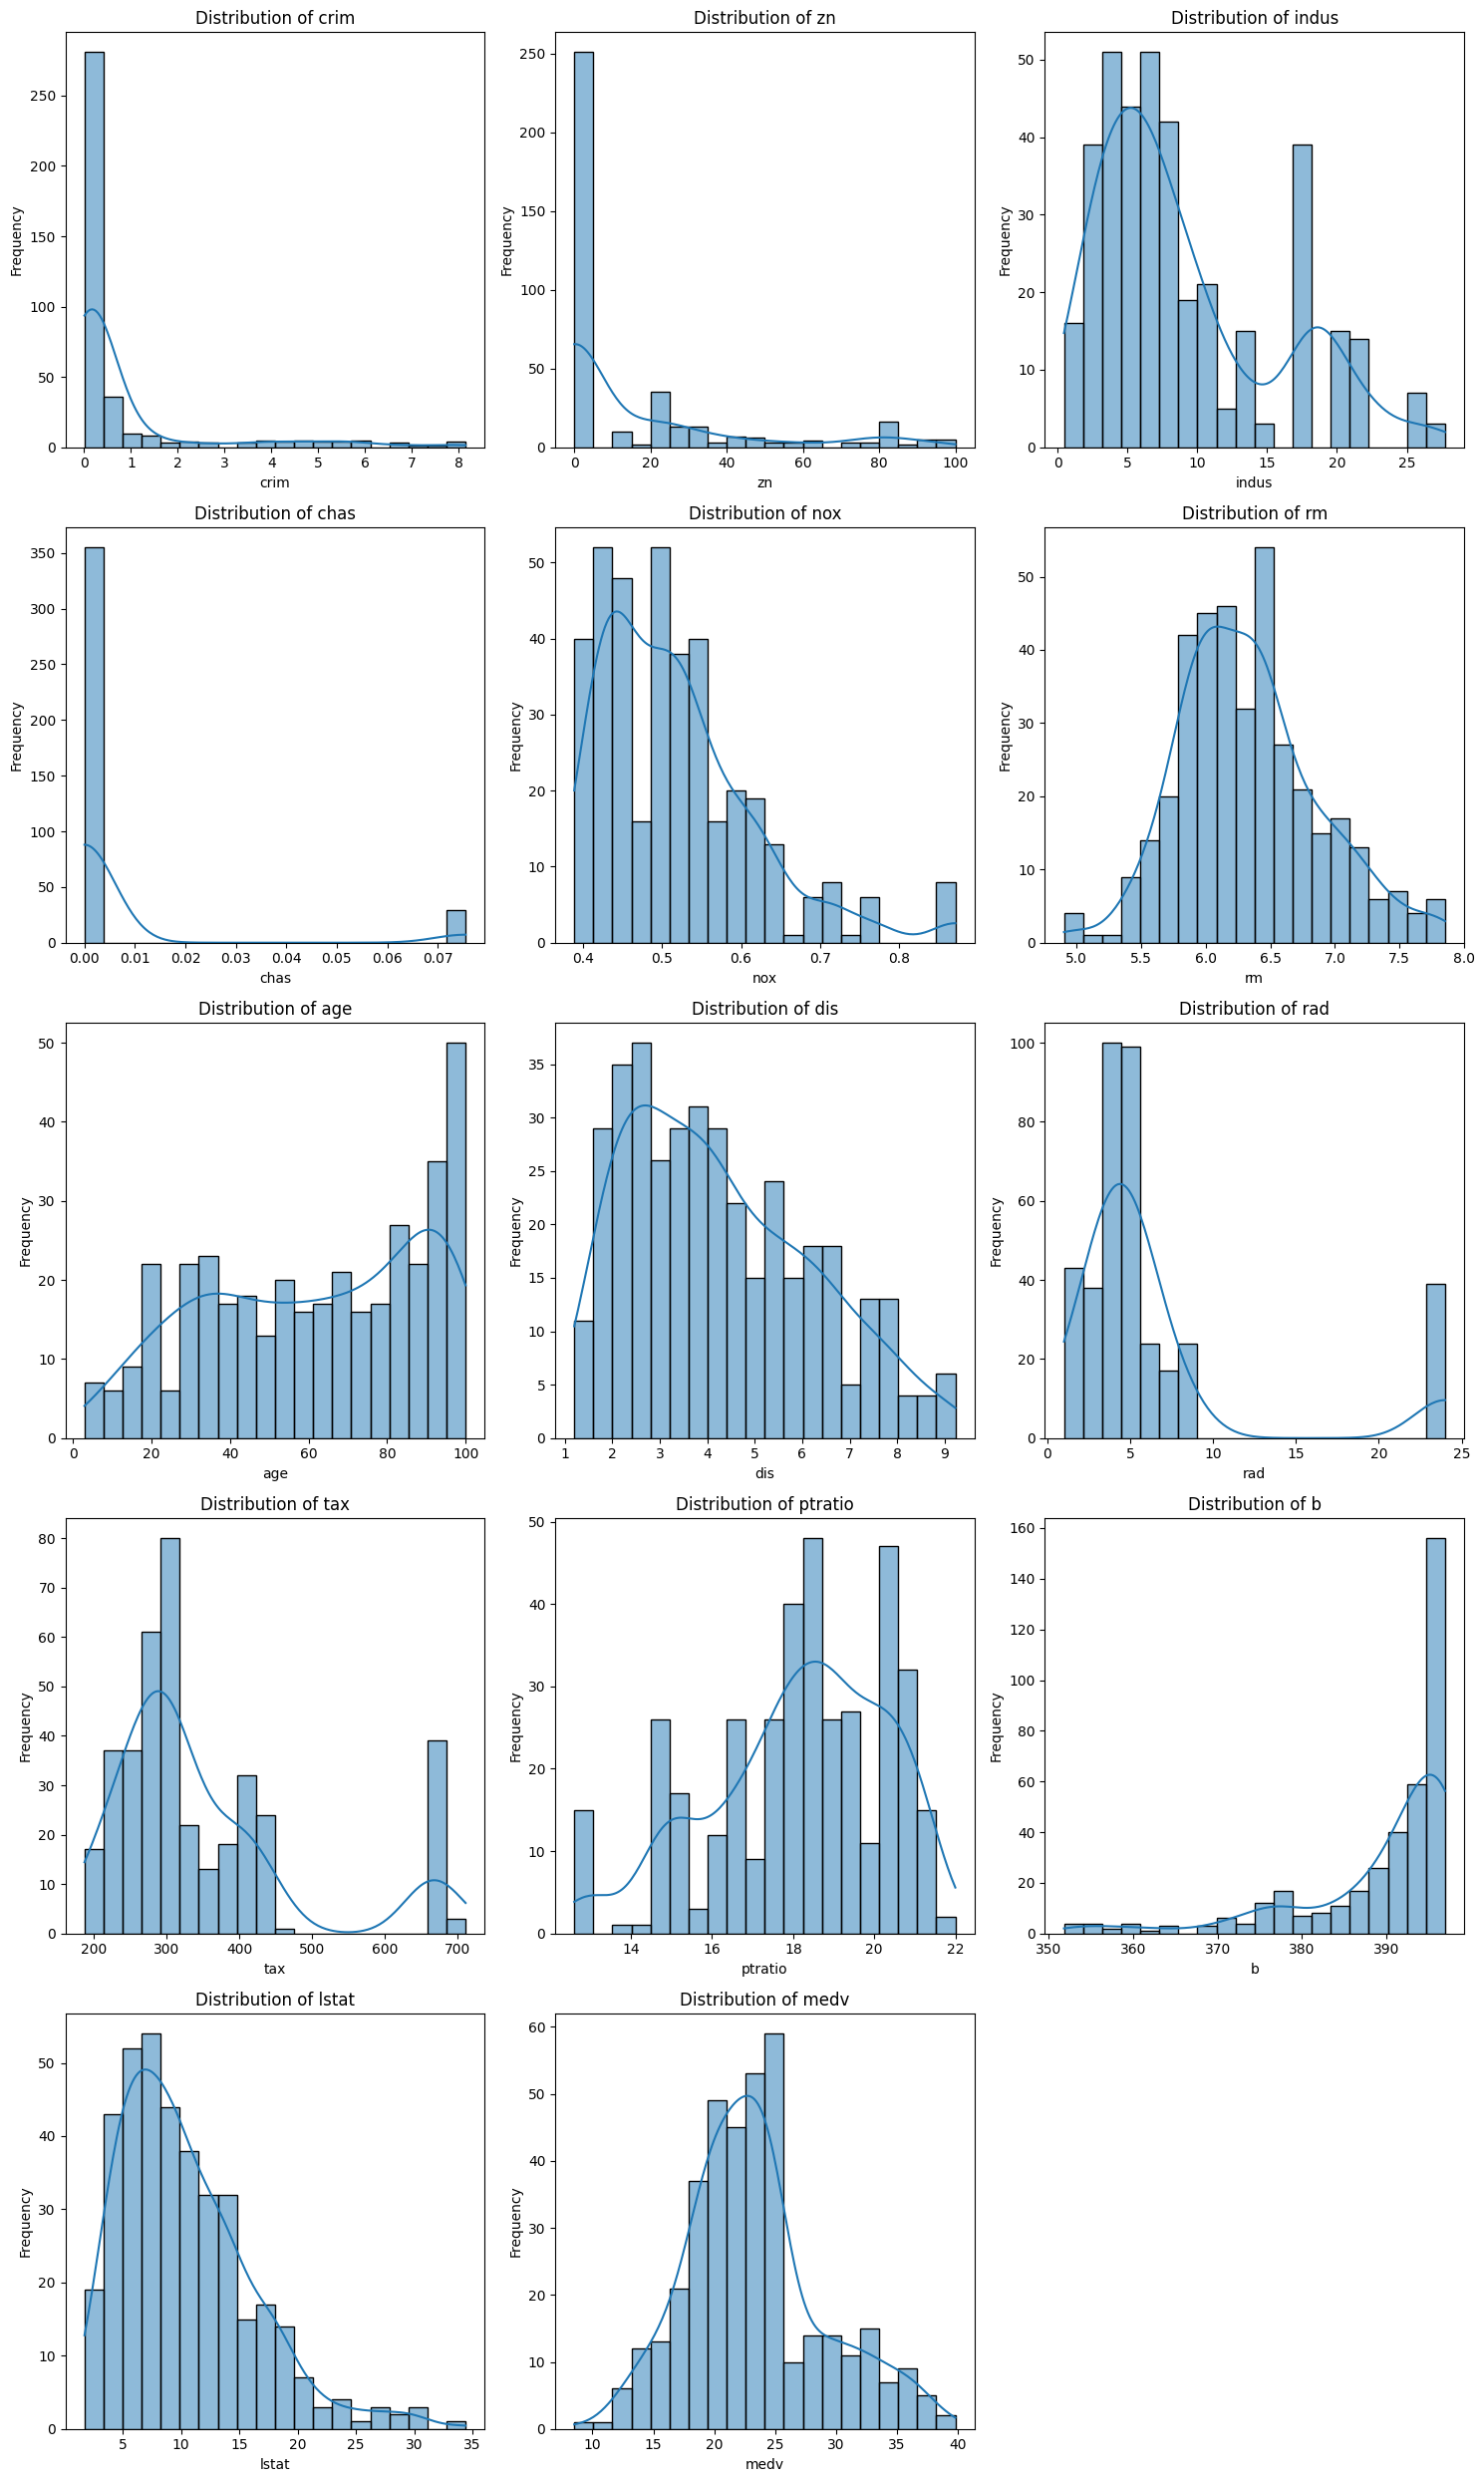

In [15]:
#### Distribution of all the columns #######

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pandas = df_housing.toPandas()

# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(df_pandas.columns) / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes into a 1D array for easy iteration
axes = axes.flatten()

# Plot the distribution of each column
for i, column in enumerate(df_pandas.columns):
    sns.histplot(df_pandas[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(len(df_pandas.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust subplot layout
plt.tight_layout()

# Show all the plots in one screen
plt.show()


In [16]:
df_housing = df_housing.drop("zn", "chas")



In [17]:
df_housing.describe().show()

+-------+------------------+-----------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|            indus|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+-----------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               384|              384|                384|               384|               384|              384|              384|               384|               384|               384|               384|               384|
|   mean|0.8042654947916672|9.086744791666666| 0.5180252

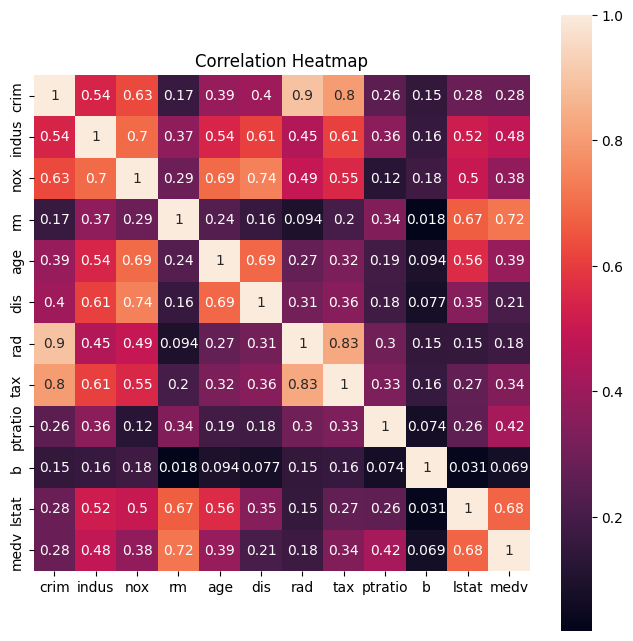

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import corr

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pandas = df_housing.toPandas()

# Calculate the correlation matrix
correlation_matrix = df_pandas.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix.abs(), annot=True, square=True)
plt.title("Correlation Heatmap")
plt.show()


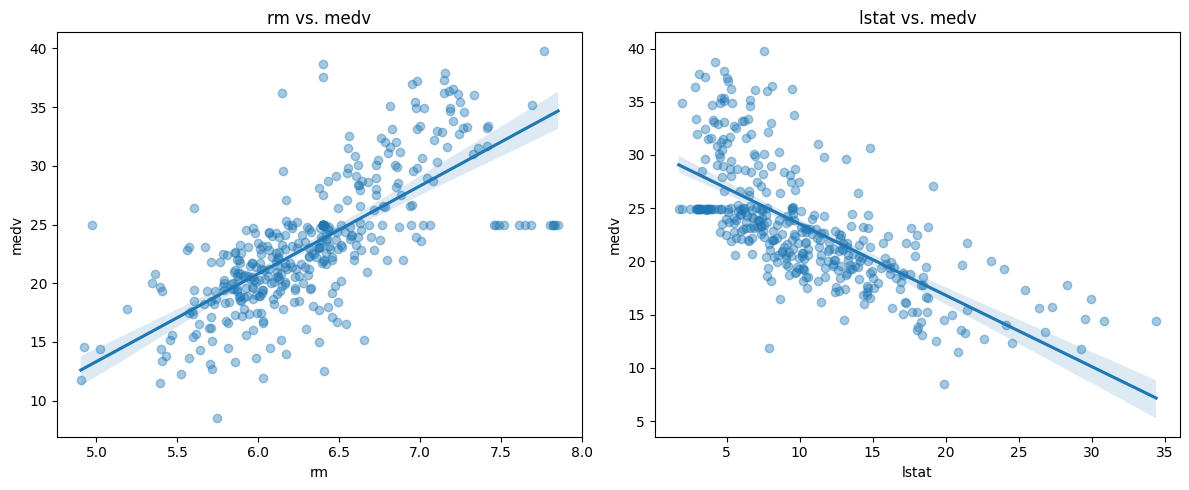

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# Assuming 'df_housing' is your PySpark DataFrame

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
df_pandas = df_housing.toPandas()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 'RM' vs. 'MEDV'
sns.regplot(x='rm', y='medv', data=df_pandas, ax=axes[0], scatter_kws={'alpha': 0.4})
axes[0].set_title('rm vs. medv')
axes[0].set_xlabel('rm')
axes[0].set_ylabel('medv')

# Plot 'LSTAT' vs. 'MEDV'
sns.regplot(x='lstat', y='medv', data=df_pandas, ax=axes[1], scatter_kws={'alpha': 0.4})
axes[1].set_title('lstat vs. medv')
axes[1].set_xlabel('lstat')
axes[1].set_ylabel('medv')


plt.tight_layout()
plt.show()




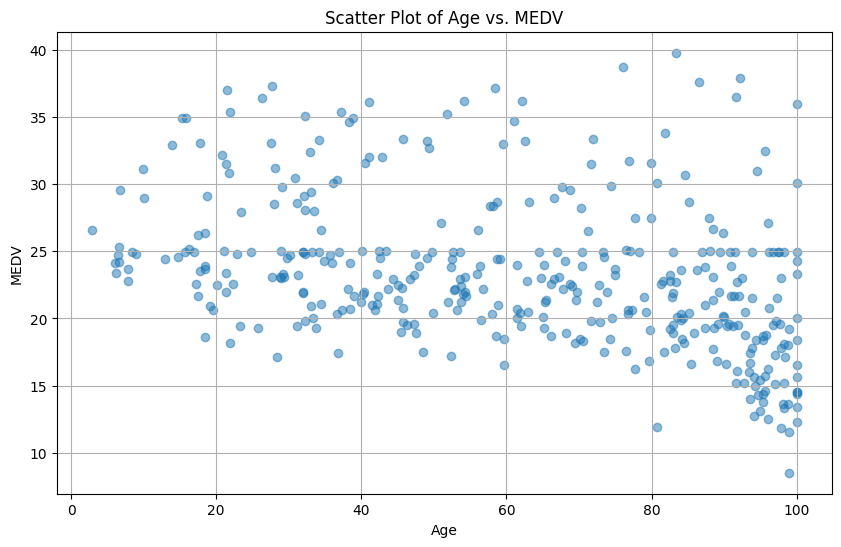

In [20]:
import matplotlib.pyplot as plt


# Select the 'TAX' and 'MEDV' columns
selected_data = df_housing.select("age", "medv")

# Convert the selected data to a Pandas DataFrame for plotting
selected_data_pandas = selected_data.toPandas()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_data_pandas["age"], selected_data_pandas["medv"], alpha=0.5)
plt.title("Scatter Plot of Age vs. MEDV")
plt.xlabel("Age")
plt.ylabel("MEDV")
plt.grid(True)
plt.show()



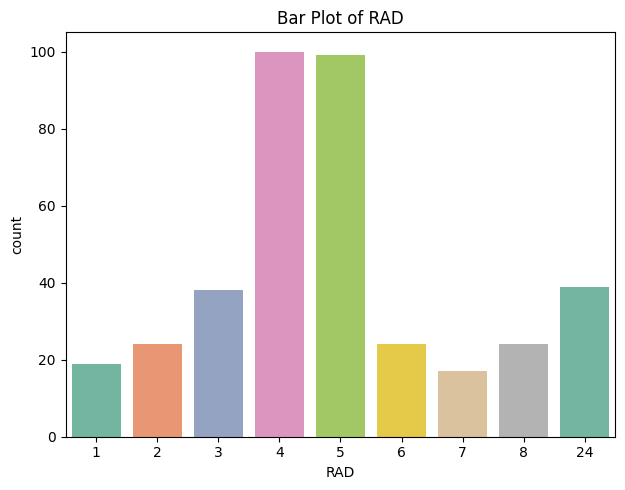

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import col


# Read your data into df_housing here
# df_housing = ...

# Select the 'RAD' and 'CHAS' columns
selected_data = df_housing.select("RAD")

# Convert the selected data to a Pandas DataFrame for plotting
selected_data_pandas = selected_data.toPandas()

# Create bar plots
plt.figure(figsize=(12, 5))

# Bar plot for 'RAD'
plt.subplot(1, 2, 1)
sns.countplot(data=selected_data_pandas, x="RAD", palette="Set2")
plt.title("Bar Plot of RAD")

# Bar plot for 'CHAS'
#plt.subplot(1, 2, 2)
#sns.countplot(data=selected_data_pandas, x="indus", palette="Set1")
#plt.title("Bar Plot of RM")

plt.tight_layout()
plt.show()




<ipython-input-22-545dbb12ec5e>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_pandas["tax"], shade=True)


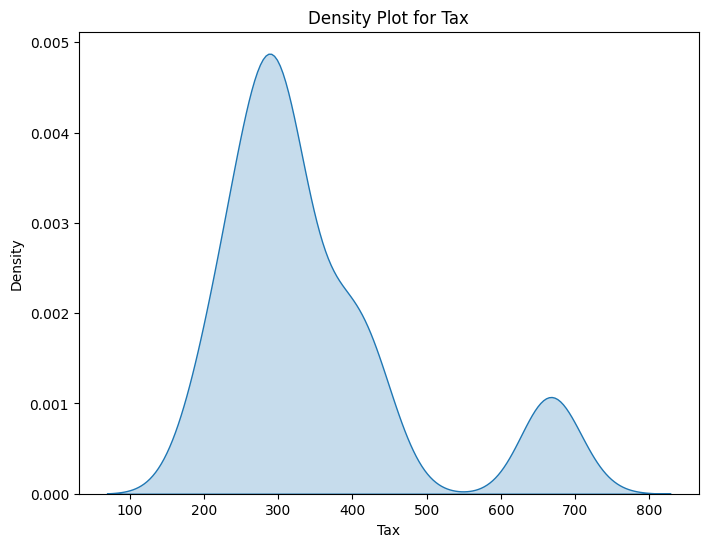

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pandas = df_housing.select("tax").toPandas()

# Create a density plot using Seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(df_pandas["tax"], shade=True)
plt.title("Density Plot for Tax")
plt.xlabel("Tax")
plt.ylabel("Density")
plt.show()


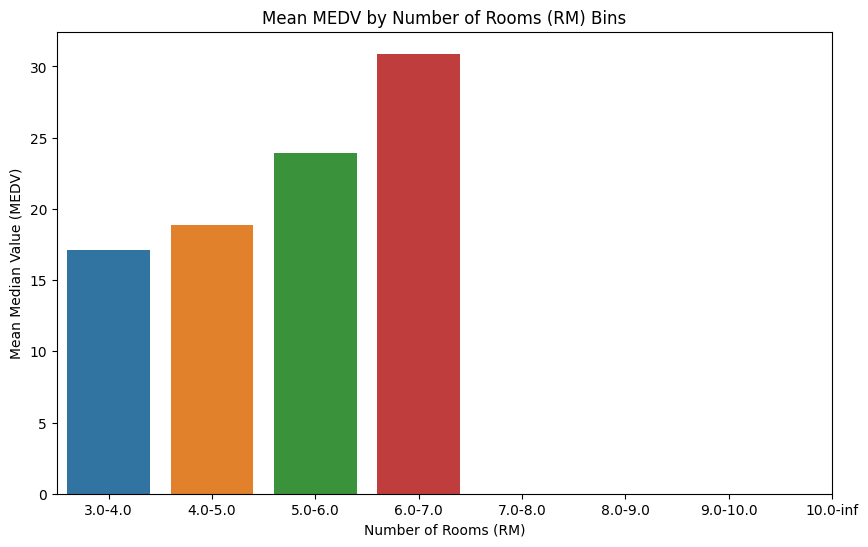

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, avg
from pyspark.ml.feature import Bucketizer
from pyspark.ml import Pipeline



# Define the bin edges for the "RM" column (you can customize this)
bin_edges = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, float("inf")]

# Create a Bucketizer to put "RM" values into bins
bucketizer = Bucketizer(splits=bin_edges, inputCol="rm", outputCol="RM_bin")

# Apply the Bucketizer to the DataFrame
df_housing1 = bucketizer.transform(df_housing)

# Group by the "RM_bin" column and calculate the mean "MEDV" for each bin
result = df_housing1.groupBy("RM_bin").agg(avg("MEDV").alias("Mean_MEDV"))

# Convert the result DataFrame to Pandas for plotting
result_pandas = result.toPandas()

# Create a bar plot to visualize the mean "MEDV" for each bin
plt.figure(figsize=(10, 6))
sns.barplot(data=result_pandas, x="RM_bin", y="Mean_MEDV")
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("Mean Median Value (MEDV)")
plt.title("Mean MEDV by Number of Rooms (RM) Bins")
plt.xticks(range(len(bin_edges)-1), [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)])
plt.show()



In [24]:

from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col, mean, stddev, min, max
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number,expr



# Define the bin edges for the "RM" column (customize as needed)
#bin_edges = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, float("inf")]

# Create a Bucketizer to put "RM" values into bins
#bucketizer = Bucketizer(splits=bin_edges, inputCol="rm", outputCol="RM_bin")

# Apply the Bucketizer to the DataFrame
#df_housing1 = bucketizer.transform(df_housing)

# Define the aggregation functions
agg_functions = [
    mean("MEDV").alias("Mean_MEDV"),
    stddev("MEDV").alias("StdDev_MEDV"),
    min("MEDV").alias("Min_MEDV"),
    max("MEDV").alias("Max_MEDV")
]

# Calculate median using window function
window_spec = Window.partitionBy("RM_bin").orderBy("MEDV")
df_housing1 = df_housing1.withColumn("row_num", row_number().over(window_spec))
median_expr = "percentile_approx(MEDV, 0.5)"
df_housing1 = df_housing1.groupBy("RM_bin").agg(*agg_functions, expr(median_expr).alias("Median_MEDV"))

# Show the resulting DataFrame
df_housing1.show()




+------+------------------+-----------------+--------+-----------------+-----------+
|RM_bin|         Mean_MEDV|      StdDev_MEDV|Min_MEDV|         Max_MEDV|Median_MEDV|
+------+------------------+-----------------+--------+-----------------+-----------+
|   1.0|17.119097222222226|6.930942873209238|    11.8|24.95729166666668|       14.6|
|   4.0|30.894451992753623|4.743846902294049|    23.6|             39.8|       31.7|
|   3.0|23.907310022026433|4.656110199520703|    11.9|             38.7|       23.4|
|   2.0|18.860185185185177|3.191868752566472|     8.5|             26.4|       19.3|
+------+------------------+-----------------+--------+-----------------+-----------+



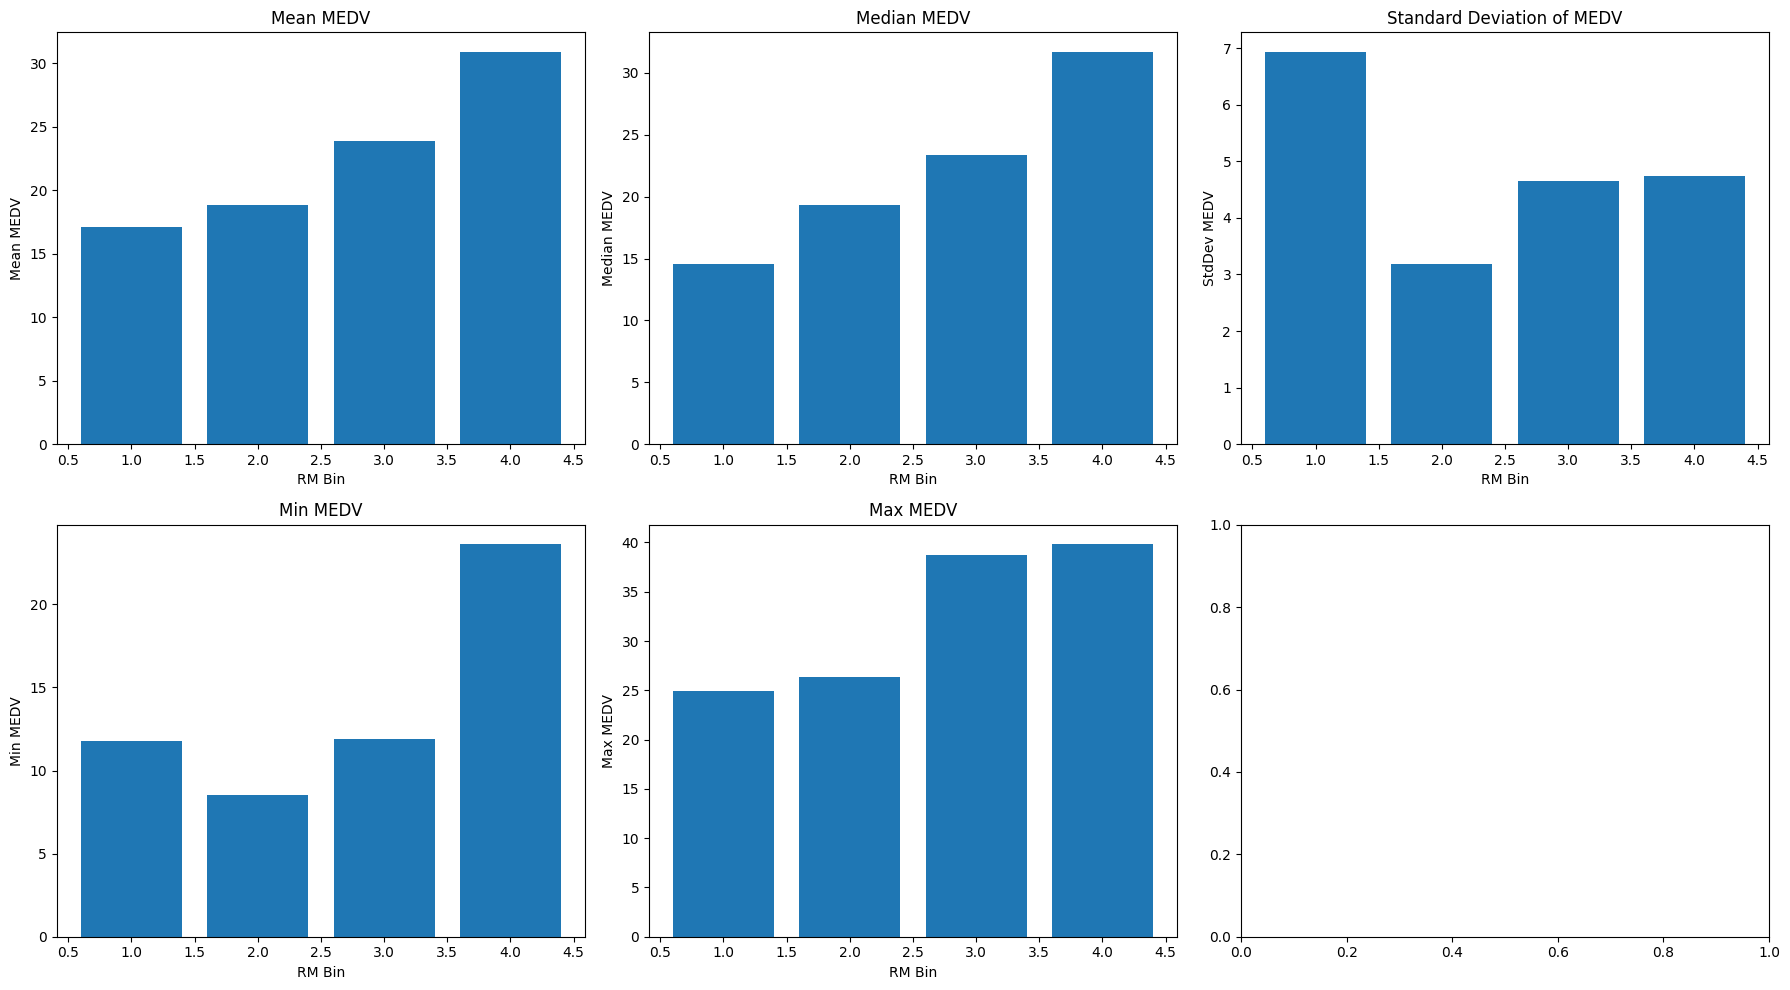

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Spark DataFrame to a Pandas DataFrame
df_pandas = df_housing1.toPandas()

# Define the bins and statistics
bins = df_pandas["RM_bin"]
mean_values = df_pandas["Mean_MEDV"]
median_values = df_pandas["Median_MEDV"]
stddev_values = df_pandas["StdDev_MEDV"]
min_values = df_pandas["Min_MEDV"]
max_values = df_pandas["Max_MEDV"]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Bar chart for Mean MEDV
axes[0, 0].bar(bins, mean_values)
axes[0, 0].set_title("Mean MEDV")
axes[0, 0].set_xlabel("RM Bin")
axes[0, 0].set_ylabel("Mean MEDV")

# Bar chart for Median MEDV
axes[0, 1].bar(bins, median_values)
axes[0, 1].set_title("Median MEDV")
axes[0, 1].set_xlabel("RM Bin")
axes[0, 1].set_ylabel("Median MEDV")

# Bar chart for Standard Deviation of MEDV
axes[0, 2].bar(bins, stddev_values)
axes[0, 2].set_title("Standard Deviation of MEDV")
axes[0, 2].set_xlabel("RM Bin")
axes[0, 2].set_ylabel("StdDev MEDV")

# Bar chart for Min MEDV
axes[1, 0].bar(bins, min_values)
axes[1, 0].set_title("Min MEDV")
axes[1, 0].set_xlabel("RM Bin")
axes[1, 0].set_ylabel("Min MEDV")

# Bar chart for Max MEDV
axes[1, 1].bar(bins, max_values)
axes[1, 1].set_title("Max MEDV")
axes[1, 1].set_xlabel("RM Bin")
axes[1, 1].set_ylabel("Max MEDV")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
spark.sparkContext.stop()